### Program Assignment #4 - Backpropagation
#### 0611262 曾長彥

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0x611262)

In [3]:
# Run forward propagation and record the output of every layer
def forward(X, weights):
    out = [X]
    for w in weights:
        out.append(sigmoid(np.dot(out[-1], w)))
    return out

In [4]:
# Sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [5]:
# Sigmoid Deriv function (assume s = sigmoid(x))
def sigmoid_deriv(s):
    return s * (1 - s)

In [6]:
# Run back propagation and return delta
def backprop(weights, out, y):
    delta = []
    error = y - out[-1]
    delta.append(error * sigmoid_deriv(out[-1]))

    for i in range(1, len(weights)):
        error = np.dot(delta[-1], weights[-i].T)
        delta.append(error * sigmoid_deriv(out[-i - 1]))

    delta.reverse()
    return delta

In [7]:
# Update weights according to delta
def update_weights(weights, out, delta, learning_rate = 0.0001):
    for i in range(len(weights)):
        weights[i] += np.dot(out[i].T, delta[i]) * learning_rate

In [8]:
# Read and shape data
df = pd.read_csv("./data.txt", header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values.reshape(-1, 1)

In [9]:
# Initialize weights
weights = []
weights.append(np.random.randn(X.shape[1], 5))
weights.append(np.random.randn(5, 5))
weights.append(np.random.randn(5, 1))
weights

[array([[-0.49361266, -0.78624966,  1.59704471,  0.59968017, -0.17815414],
        [ 1.17102273, -0.65780873,  1.84633942, -1.94676484, -0.05023596]]),
 array([[-1.59105551, -0.77154461,  1.42976982,  1.66437749, -1.2661338 ],
        [ 0.25097529,  0.92696008,  0.74680932, -0.40814751, -0.4271223 ],
        [-1.12978192, -0.11732799,  0.19594879, -0.43924664, -0.20884932],
        [ 0.76973961,  0.8056208 , -0.22905399, -0.14262959, -0.19346218],
        [-0.86434239, -1.0569601 , -0.57325529,  1.09975427,  1.07946555]]),
 array([[-0.36126114],
        [-1.04662819],
        [ 2.09161678],
        [ 0.32951025],
        [-0.97712984]])]

In [10]:
# Main training code, iterate 2000 times
for i in range(1, 2000 + 1):
    out = forward(X, weights)
    if i == 1 or i % 100 == 0:
        print("Iteration: ", i)
        print("Loss: ", np.mean(np.square(y - out[-1])))  # Calculate mean L2-norm
        ans = np.where(out[-1] > 0.5, 1, 0)
        print(f"Accuracy: {np.sum(ans == y) / len(y) * 100:.2f}%")
        print()
    delta = backprop(weights, out, y)
    update_weights(weights, out, delta)

Iteration:  1
Loss:  0.29788988022227547
Accuracy: 56.00%

Iteration:  100
Loss:  0.27744155793331765
Accuracy: 56.00%

Iteration:  200
Loss:  0.24646477714110943
Accuracy: 57.00%

Iteration:  300
Loss:  0.2241424081241242
Accuracy: 58.00%

Iteration:  400
Loss:  0.21282196731865835
Accuracy: 61.00%

Iteration:  500
Loss:  0.1836797255129477
Accuracy: 84.00%

Iteration:  600
Loss:  0.14098392755088254
Accuracy: 96.00%

Iteration:  700
Loss:  0.13630194542483032
Accuracy: 96.00%

Iteration:  800
Loss:  0.13212721553558657
Accuracy: 96.00%

Iteration:  900
Loss:  0.12839061948781075
Accuracy: 96.00%

Iteration:  1000
Loss:  0.12495621654379072
Accuracy: 96.00%

Iteration:  1100
Loss:  0.12180647941269385
Accuracy: 98.00%

Iteration: 1200
Loss:  0.11906687978909446
Accuracy: 98.00%

Iteration:  1300
Loss:  0.116632822013775
Accuracy: 98.00%

Iteration:  1400
Loss:  0.11438986369807048
Accuracy: 99.00%

Iteration:  1500
Loss:  0.11228646043154036
Accuracy: 100.00%

Iteration:  1600
Loss:  

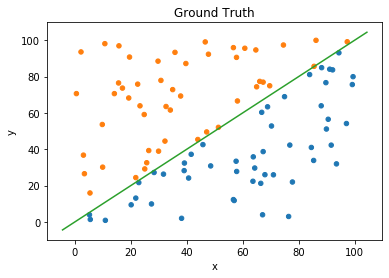

In [11]:
# Plot ground truth
label_color = df.iloc[:,-1].map({0: "tab:blue", 1: "tab:orange"})
plot = df.plot.scatter(x=0, y=1, c=label_color)
x = np.linspace(*plot.get_xlim())
plot.plot(x, x, color="tab:green")
plot.set_xlabel("x")
plot.set_ylabel("y")
plot.set_title("Ground Truth")
plot

Accuracy: 100.00%


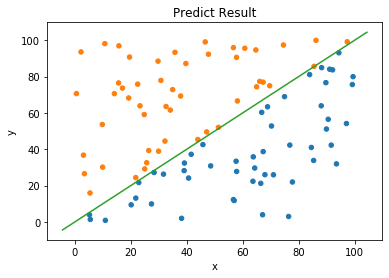

In [12]:
# Plot result
label_color = pd.Series(np.where(out[-1] > 0.5, 1, 0).flat).map({0: "tab:blue", 1: "tab:orange"})
plot = df.plot.scatter(x=0, y=1, c=label_color)
x = np.linspace(*plot.get_xlim())
plot.plot(x, x, color="tab:green")
plot.set_xlabel("x")
plot.set_ylabel("y")
ans = np.where(out[-1] > 0.5, 1, 0)
print(f"Accuracy: {np.sum(ans == y) / len(y) * 100:.2f}%")
plot.set_title("Predict Result")
plot